In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

# Extend PATH Variable
import sys
sys.path.append("../../../src/")

# NanoNets Simulation Tool
import nanonets
import nanonets_utils

import multiprocessing

#### Base Simulation

In [8]:
def parallel_code(thread, time_steps, voltages, network_topology, topology_parameter,  np_info, folder, R, Rstd):

    for rem_d in np.arange(1,21,1):

        nanonets_utils.memory_capacity_simulation(time_steps, voltages, train_length=5000, test_length=5000, remember_distance=rem_d, folder=folder, np_info=np_info,
                                                network_topology=network_topology, topology_parameter=topology_parameter, save_th=0.1, path_info=f'_{thread}', R=R, Rstd=Rstd)

#### Input Voltage

Number of Steps: 50000


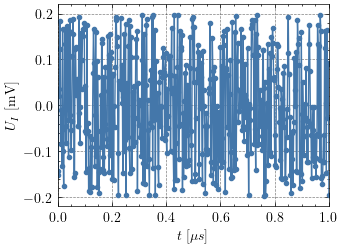

In [4]:
# Define Time Scale
step_size   = 2e-9
max_time    = 1e-4
time_steps  = np.arange(0,max_time,step_size)
N_steps     = len(time_steps)

print(f"Number of Steps: {N_steps}")

input_volt = np.random.uniform(-0.2,0.2,N_steps)

# Voltage Array
voltages        = np.zeros((N_steps, 9))
voltages        = np.zeros((N_steps, 9))
voltages[:,0]   = input_volt

# Plot
with plt.style.context(["science","bright","grid"]):
    
    plt.plot(time_steps*10**6, input_volt, '.-')
    plt.xlabel("$t$ [$\mu s$]")
    plt.ylabel("$U_I$ [mV]")
    plt.xlim(0,1)
    plt.show()

#### Init Network

In [34]:
# Network Style
network_topology    = "cubic"
N_d                 = 7 
topology_parameter  = {
    "Nx"    : N_d,
    "Ny"    : N_d,
    "Nz"    : 1,
    "e_pos" : [[0,0,0],[3,0,0],[0,3,0],[6,0,0],[0,6,0],[6,3,0],[3,6,0],[6,6,0]]
}

# Topology Class
np_network_sim = nanonets.simulation(network_topology=network_topology, topology_parameter=topology_parameter)

In [35]:
np_network_sim.G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, -1, -2, -3, -4, -5, -6, -7, -8))

In [36]:
np_network_sim.G.edges

OutEdgeView([(0, 1), (0, 7), (0, -1), (1, 0), (1, 2), (1, 8), (2, 1), (2, 3), (2, 9), (3, 2), (3, 4), (3, 10), (3, -2), (4, 3), (4, 5), (4, 11), (5, 4), (5, 6), (5, 12), (6, 5), (6, 13), (6, -4), (7, 0), (7, 8), (7, 14), (8, 1), (8, 7), (8, 9), (8, 15), (9, 2), (9, 8), (9, 10), (9, 16), (10, 3), (10, 9), (10, 11), (10, 17), (11, 4), (11, 10), (11, 12), (11, 18), (12, 5), (12, 11), (12, 13), (12, 19), (13, 6), (13, 12), (13, 20), (14, 7), (14, 15), (14, 21), (15, 8), (15, 14), (15, 16), (15, 22), (16, 9), (16, 15), (16, 17), (16, 23), (17, 10), (17, 16), (17, 18), (17, 24), (18, 11), (18, 17), (18, 19), (18, 25), (19, 12), (19, 18), (19, 20), (19, 26), (20, 13), (20, 19), (20, 27), (21, 14), (21, 22), (21, 28), (21, -3), (22, 15), (22, 21), (22, 23), (22, 29), (23, 16), (23, 22), (23, 24), (23, 30), (24, 17), (24, 23), (24, 25), (24, 31), (25, 18), (25, 24), (25, 26), (25, 32), (26, 19), (26, 25), (26, 27), (26, 33), (27, 20), (27, 26), (27, 34), (27, -6), (28, 21), (28, 29), (28, 35), 

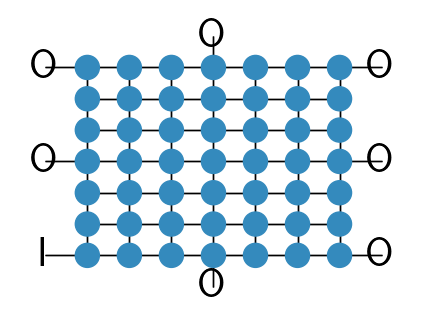

In [6]:
fig, ax = nanonets_utils.display_network(np_network_sim, provide_electrode_labels=['I','O','O','O','O','O','O','O'],
                                         font_size=30, save_to_path='plots/network.pdf', width_scale=1.5, height_scale=1.5)

#### Lattice without Disorder

In [8]:
N_processes = 10
folder      = "data/lattice_without_disorder/"

for i in range(N_processes):

    process = multiprocessing.Process(target=parallel_code, args=(i,time_steps,voltages,network_topology,topology_parameter,None,folder,25,0))
    process.start()

#### Lattice with C-Disorder

In [10]:
N_processes = 10
folder      = "data/lattice_C_disorder/"
np_info     = {
        "eps_r"         : 2.6,
        "eps_s"         : 3.9,
        "mean_radius"   : 10.0,
        "std_radius"    : 2.0,
        "np_distance"   : 1.0
    }

for i in range(N_processes):

    process = multiprocessing.Process(target=parallel_code, args=(i,time_steps,voltages,network_topology,topology_parameter,np_info,folder,25,0))
    process.start()

#### Lattice with R-Disorder

In [9]:
N_processes = 10
folder      = "data/lattice_R_disorder/"

for i in range(N_processes):

    process = multiprocessing.Process(target=parallel_code, args=(i,time_steps,voltages,network_topology,topology_parameter,None,folder,25,5))
    process.start()

#### Load Data

In [10]:
def load_data(folder):

    mc_mean = []
    mc_stds = []

    for rem_d in np.arange(1,21,1):

        values = []
        
        for i in range(10):

            df  = pd.read_csv(f"{folder}mc_test_results_{rem_d}_{i}.csv", index_col=0)

            values.append(df.corr().loc['y_pred','y_test'])

        mc_mean.append(np.mean(values))
        mc_stds.append(np.std(values)/np.sqrt(10))
    
    return mc_mean, mc_stds

In [11]:
mc_mean, mc_stds        = load_data("data/lattice_without_disorder/")
mc_mean_C, mc_stds_C    = load_data("data/lattice_C_disorder/")
mc_mean_R, mc_stds_R    = load_data("data/lattice_R_disorder/")

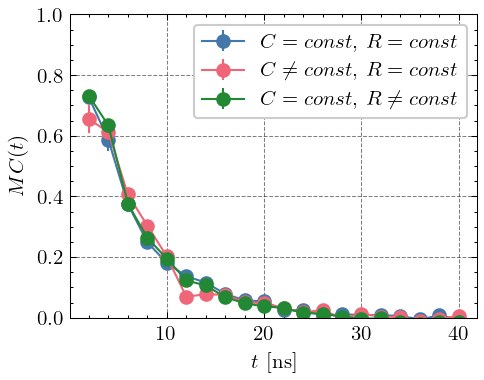

In [20]:
xvals = np.arange(1,21,1)*step_size*10**9

with plt.style.context(["science","bright","grid"]):

    plt.figure(dpi=150)
    plt.errorbar(xvals, mc_mean, mc_stds, marker='o', label='$C = const$, $R = const$')
    plt.errorbar(xvals, mc_mean_C, mc_stds_C, marker='o', label='$C \\neq const$, $R = const$')
    plt.errorbar(xvals, mc_mean_R, mc_stds_R, marker='o', label='$C = const$, $R \\neq const$')
    plt.xlabel("$t$ [ns]")
    plt.ylabel("$MC(t)$")
    plt.legend()
    plt.ylim(0,1)
    plt.show()

In [30]:
# Network Style
network_topology    = "random"
N_d                 = 49
topology_parameter  = {
    "Np"    : N_d,
    "Nj"    : 4,
    "e_pos" : [[0,0,0],[0.5,0,0],[0,0.5,0],[1,0,0],[0,1,0],[1,0.5,0],[0.5,1,0],[1,1,0]]
}

# Topology Class
np_network_sim = nanonets.simulation(network_topology=network_topology, topology_parameter=topology_parameter)

In [32]:
np_network_sim.G.nodes

NodeView((23, 29, 34, 38, 33, 40, 52, 53, 11, 21, 31, 42, 19, 22, 12, 17, 43, 47, 15, 36, 32, 10, 49, 46, 54, 41, 56, 9, 16, 37, 20, 50, 45, 28, 48, 44, 18, 25, 24, 8, 14, 35, 55, 27, 39, 30, 51, 13, 26, 0, 1, 2, 3, 4, 5, 6, 7))

In [33]:
np_network_sim.G.edges

OutEdgeView([(23, 29), (23, 33), (23, 54), (23, 18), (29, 23), (29, 47), (29, 56), (29, 43), (29, 0), (34, 38), (34, 18), (34, 45), (34, 54), (38, 34), (38, 12), (38, 17), (38, 27), (33, 40), (33, 23), (33, 22), (33, 45), (40, 33), (40, 47), (40, 51), (40, 46), (52, 53), (52, 32), (52, 20), (52, 50), (53, 52), (53, 31), (53, 37), (53, 28), (11, 21), (11, 56), (11, 42), (11, 37), (21, 11), (21, 24), (21, 12), (21, 13), (21, 4), (31, 42), (31, 53), (31, 48), (31, 22), (31, 7), (42, 31), (42, 15), (42, 32), (42, 11), (19, 22), (19, 9), (19, 48), (19, 25), (22, 19), (22, 41), (22, 31), (22, 33), (22, 1), (12, 38), (12, 44), (12, 21), (12, 43), (17, 43), (17, 50), (17, 38), (17, 48), (43, 17), (43, 28), (43, 12), (43, 29), (47, 40), (47, 29), (47, 39), (47, 55), (15, 36), (15, 42), (15, 35), (15, 10), (36, 15), (36, 24), (36, 18), (36, 8), (32, 52), (32, 42), (32, 39), (32, 26), (10, 49), (10, 50), (10, 16), (10, 15), (49, 10), (49, 8), (49, 25), (49, 20), (46, 54), (46, 20), (46, 14), (46,

/home/jonas/.local/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:425: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xy = np.asarray([pos[v] for v in nodelist])


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

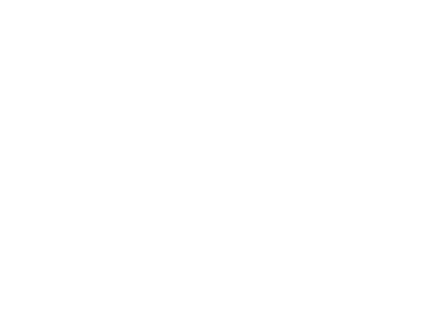

In [29]:
fig, ax = nanonets_utils.display_network(np_network_sim,
                                         font_size=30, save_to_path='plots/network.pdf', width_scale=1.5, height_scale=1.5)